In [54]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib

## 1. Reading and exploring the data

In [3]:
data_pd=pd.read_csv('epirecipes/epi_r.csv')

In [4]:
#Deleting null predictive variables from the dataset
data_pd=data_pd.loc[(data_pd.rating>0) & (~data_pd.rating.isna())]
data_pd.shape

(18216, 680)

In [5]:
#Deleting drinks
data_pd=data_pd.loc[(data_pd.drink==0) & (data_pd.drinks==0) & (data_pd.cocktail==0)]
print(data_pd.shape)
data_pd.head()

(17596, 680)


,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
for col in data_pd.columns:
    if "low" in col:
        print(col)
    if "fat" in col:
        print(col)
    if "healt" in col:
        print(col)

fat
cauliflower
fat free
father's day
halloween
healthy
low cal
low carb
low cholesterol
low fat
low fat
low sodium
low sugar
low/no sugar
marshmallow
quick and healthy
slow cooker
yellow squash


In [14]:
"""for col in data_pd.columns:
    print(col)"""

'for col in data_pd.columns:\n    print(col)'

In [16]:
selected = ["fat free", "healthy", "low cal", "quick and healthy", 
"low carb",
"low cholesterol",
"low fat",
"low sodium",
"low sugar",
"low/no sugar"]

In [23]:
# filtering rows which have "selected" columns as 1 -> healthy
data_pd["allhealthy"] = 0
for col in selected:
    data_pd.loc[data_pd[col] == 1, "allhealthy"] = 1

In [27]:
# checking if there are any na values
for col in selected:
    if ~data_pd[col].isna().any():
        print(col)

fat free
healthy
low cal
quick and healthy
low carb
low cholesterol
low fat
low sodium
low sugar
low/no sugar


In [38]:
# checking out calories

if data_pd["calories"].isna().any():
    print(data_pd.loc[data_pd["calories"].isna()].agg({"title":"count", "allhealthy": "sum", "low cal": "sum"}))
    

title         3465.0
allhealthy    1518.0
low cal        456.0
dtype: float64


In [44]:
# chekcing types of the columns

for col in selected:
    print(f"{col}: {data_pd[col].dtype}")

fat free: float64
healthy: float64
low cal: float64
quick and healthy: float64
low carb: float64
low cholesterol: float64
low fat: float64
low sodium: float64
low sugar: float64
low/no sugar: float64


In [47]:
data_pd.loc[(data_pd["calories"].isna()) & (data_pd["allhealthy"] == 0)]

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,allhealthy
7,Spicy-Sweet Kumquats,3.750,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
11,Spicy Noodle Soup,4.375,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
23,Pancetta and Taleggio Lasagna with Treviso,3.750,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
31,Moroccan-Style Preserved Lemons,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
43,Purple-Potato and Crab Gratin,3.750,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19983,Ice Cream Sundaes with Chocolate-Coffee Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
19987,Phyllo Pizza with Smoked Mozzarella and Cherry...,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
19998,Muffuletta Hot Dogs,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
20012,Pepperoni Spaghetti Cakes,3.750,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [52]:
# replacing missing values in calories by mean

median = data_pd["calories"].median()
data_pd.loc[data_pd["calories"].isna(), "calories"] = median

In [53]:
# again checking out calories

if data_pd["calories"].isna().any():
    print(data_pd.loc[data_pd["calories"].isna()].agg({"title":"count", "allhealthy": "sum", "low cal": "sum"}))

In [55]:
# EDA
import matplotlib.pyplot as plt

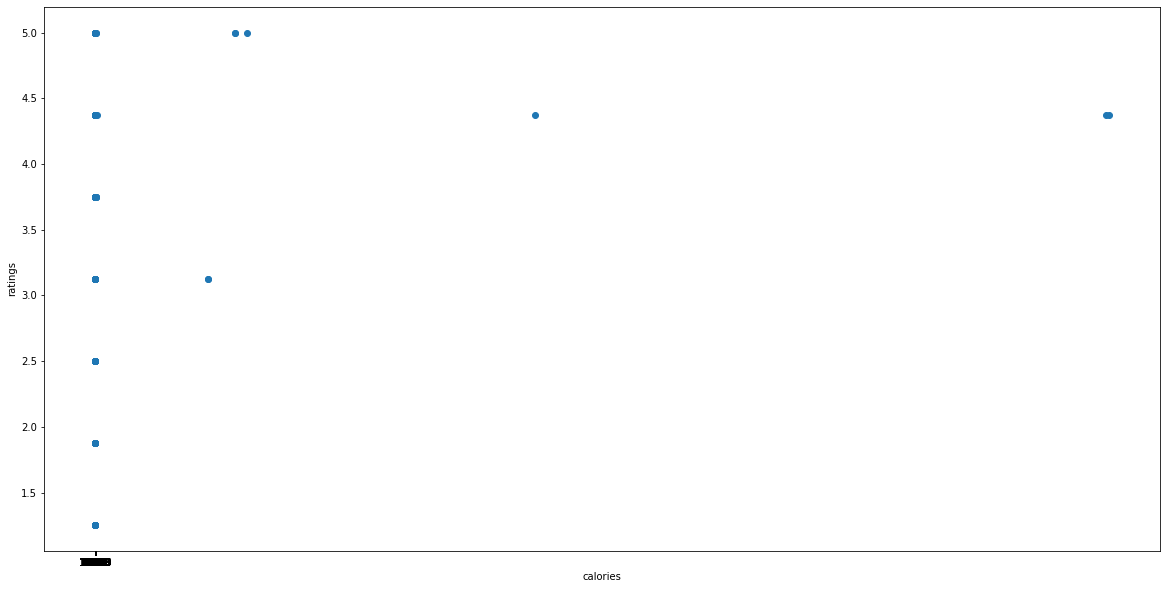

In [81]:
# plotting calories against ratings
x = data_pd["calories"]
y = data_pd["rating"]
plt.figure(figsize=(20,10))
plt.xticks(np.arange(0, 20051, 5))
plt.scatter(x, y)
plt.xlabel('calories')
plt.ylabel('ratings')
#fig.tight_layout()
plt.show()

In [64]:
# checking out calories = 0

data_pd.loc[data_pd["calories"] == 0]

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,allhealthy
285,Salted Water for Boiling,3.75,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4848,To Clarify Butter,5.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6089,Dashi (Japanese Sea Stock),5.00,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8492,To Clarify Butter,5.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9259,Spritz Wreaths,2.50,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
10741,Salted Water for Boiling,3.75,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
12805,Dashi (Japanese Sea Stock),5.00,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
13059,Salted Water for Boiling,3.75,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [72]:
# checking type of rating
data_pd["calories"].dtype
data_pd[["calories"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17596 entries, 0 to 20051
Data columns (total 1 columns):
calories    17596 non-null float64
dtypes: float64(1)
memory usage: 274.9 KB


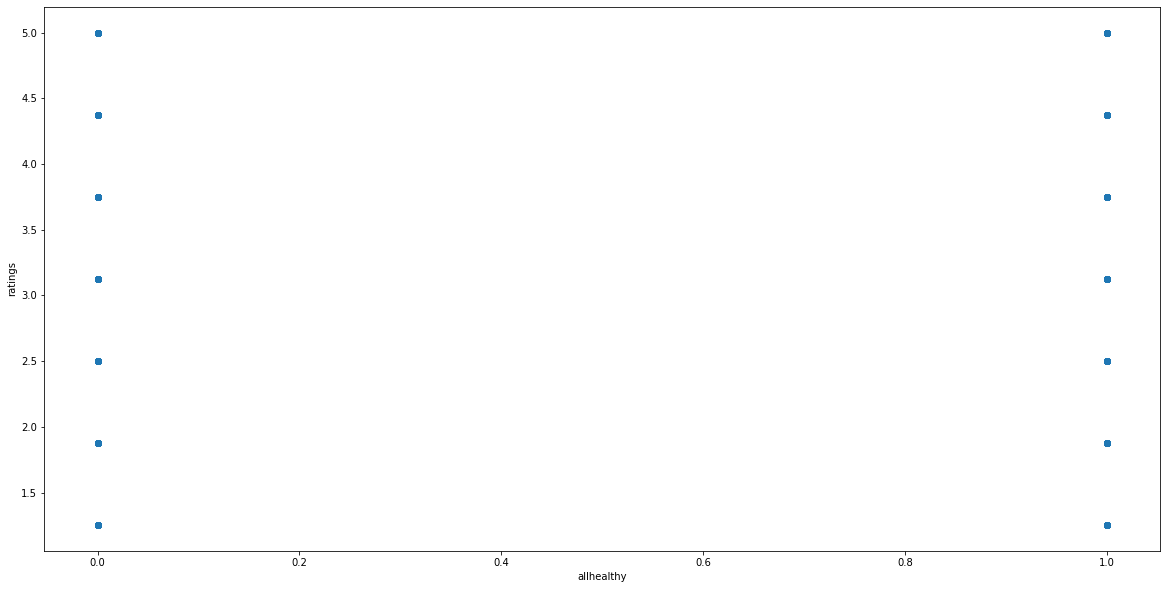

In [83]:
# plotting ratings against allhealthy variable

x = data_pd["allhealthy"]
y = data_pd["rating"]
plt.figure(figsize=(20,10))
#plt.xticks(np.arange(0, 20051, 5))
plt.scatter(x, y)
plt.xlabel('allhealthy')
plt.ylabel('ratings')
#fig.tight_layout()
plt.show()
